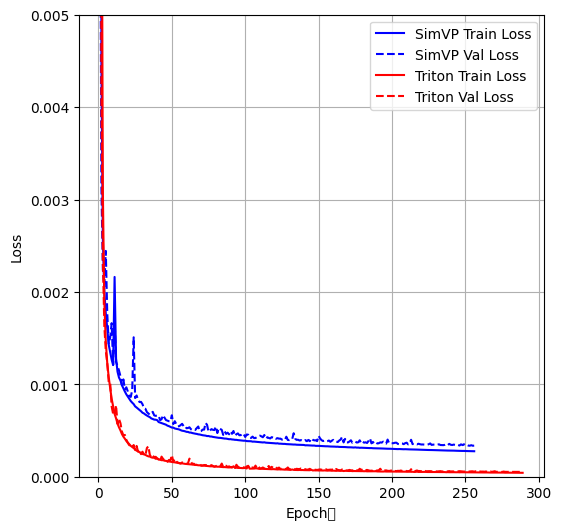

In [14]:
import re
import matplotlib.pyplot as plt

def parse_log(file_path):
    epochs = []
    train_losses = []
    val_losses = []
    
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    epoch_pattern = re.compile(r'Epoch (\d+)/\d+')
    train_loss_pattern = re.compile(r'Train Loss:\s*([\d\.]+)')
    val_loss_pattern = re.compile(r'Val Loss:\s*([\d\.]+)')
    
    current_epoch = None
    
    for line in lines:
        line = line.strip()  
        epoch_match = epoch_pattern.search(line)
        if epoch_match:
            current_epoch = int(epoch_match.group(1))
        train_loss_match = train_loss_pattern.search(line)
        if train_loss_match:
            train_loss = float(train_loss_match.group(1))
            if current_epoch is not None:
                epochs.append(current_epoch)
                train_losses.append(train_loss)
        val_loss_match = val_loss_pattern.search(line)
        if val_loss_match:
            val_loss = float(val_loss_match.group(1))
            if current_epoch is not None:
                val_losses.append(val_loss)
    
    return epochs, train_losses, val_losses

epochs1, train_losses1, val_losses1 = parse_log('SimVP_model_ns_0107_single_step_training_log.log')

epochs2, train_losses2, val_losses2 = parse_log('Triton_model_ns_0107_single_step_training_log.log')

plt.figure(figsize=(6, 6))

plt.plot(epochs1, train_losses1, label='SimVP Train Loss', color='blue', linestyle='-')
plt.plot(epochs1, val_losses1, label='SimVP Val Loss', color='blue', linestyle='--')

plt.plot(epochs2, train_losses2, label='Triton Train Loss', color='red', linestyle='-')
plt.plot(epochs2, val_losses2, label='Triton Val Loss', color='red', linestyle='--')

plt.xlabel('Epoch）')
plt.ylabel('Loss')
plt.ylim(bottom=0, top=0.005)
plt.legend()
plt.grid(True)
plt.show()